In [2]:
import meep as mp

# 공통 파라미터
resolution = 50
fcen      = 1.0      # 중심 주파수
df        = 0.2      # 주파수 대역폭
nfreq     = 100      # 빈도 샘플 개수
cell      = mp.Vector3(16, 8, 0)
src_pt    = mp.Vector3(-7, 0, 0)
flux_region = mp.FluxRegion(center=mp.Vector3(-5,0,0),
                            size=mp.Vector3(0,8,0),
                            direction=mp.X)

# ─── 1) 기준(normalization) 런: 구조 없이 소스만
sim_norm = mp.Simulation(cell_size=cell,
                         resolution=resolution,
                         sources=[mp.Source(mp.GaussianSource(fcen, fwidth=df),
                                            component=mp.Ez,
                                            center=src_pt)],
                         boundary_layers=[mp.PML(1.0)])
# 플럭스 모니터 달기
fmon_norm = sim_norm.add_flux(fcen, df, nfreq, flux_region)
sim_norm.run(until=200)

# 기준 플럭스(벡터)와 데이터 저장
flux_norm = mp.get_fluxes(fmon_norm)            # [P_no_norm(f_i)] 리스트
flux_norm_data = sim_norm.get_flux_data(fmon_norm)

# ─── 2) 실제 구조 런: geometry 추가
geometry = [ mp.Block(material=mp.Medium(epsilon=12),
                      size=mp.Vector3(1,6,mp.inf),
                      center=mp.Vector3(0,0,0)) ]
sim = mp.Simulation(cell_size=cell,
                    resolution=resolution,
                    sources=[mp.Source(mp.GaussianSource(fcen, fwidth=df),
                                       component=mp.Ez,
                                       center=src_pt)],
                    boundary_layers=[mp.PML(1.0)],
                    geometry=geometry)

# 동일 위치에 플럭스 모니터 달고, 기준 데이터 로드
fmon = sim.add_flux(fcen, df, nfreq, flux_region)
sim.load_minus_flux_data(fmon, flux_norm_data)

# 구조 포함해서 런
sim.run(until=200)

# ─── 결과 확인: 정규화된 플럭스 (cw_norm)
flux = mp.get_fluxes(fmon)  # [P_with_structure(f_i)] 리스트
freqs= mp.get_flux_freqs(fmon)
flux_cw_norm = [ f/ n for f, n in zip(flux, flux_norm) ]

# 출력
for f_i, p_raw, p_norm in zip(freqs, flux, flux_cw_norm):
    print(f"f={f_i:.3f}  P_no_norm={p_raw:.6e}  P_cw_norm={p_norm:.6e}")


-----------
Initializing structure...
time for choose_chunkdivision = 0.000231028 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 50
time for set_epsilon = 0.172683 s
-----------
Meep progress: 76.17/200.0 = 38.1% done in 4.0s, 6.5s to go
on time step 7617 (time=76.17), 0.000525186 s/step
run 0 finished at t = 200.0 (20000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000226974 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 50
     block, center = (0,0,0)
          size (1,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.182588 s
-----------
Meep progress: 70.39/200.0 = 35.2% done in 4.0s, 7.4s to go
on time step 7039 (time=70.39), 0.000568344 s/step
Meep progress: 140.62/200.0 = 70.3% done in 8.0s, 3.4s to go
on time step 14063 (time=140.63), 0.000569516 s/step
run 0 finished at t = 200.0 (20000 timesteps)

     block, center = (0,0,0)
          size (1,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


<Axes: xlabel='X', ylabel='Y'>

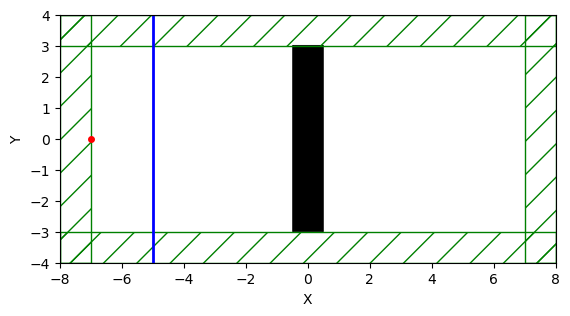

In [5]:
sim.plot2D()

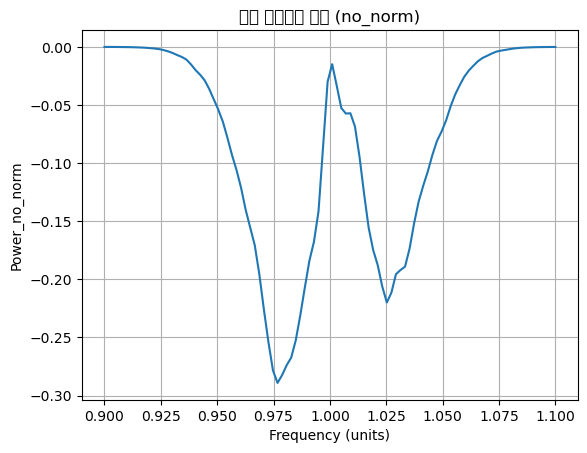

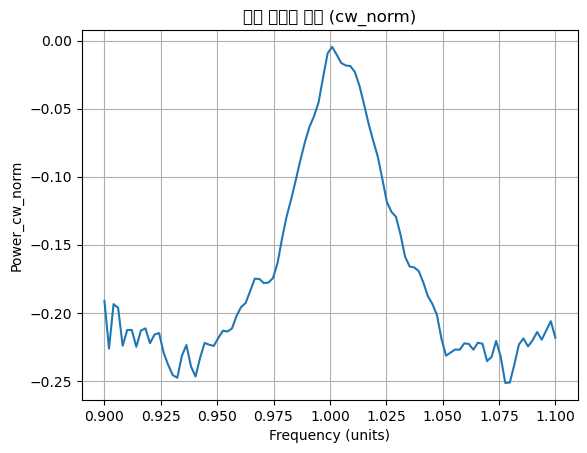

In [4]:
import matplotlib.pyplot as plt

# sim.all_freqs, flux, flux_cw_norm 은 앞서 계산된 변수들이라고 가정합니다.
flux_raw    = flux                # P_no_norm 리스트
flux_normed = flux_cw_norm        # P_cw_norm 리스트

# 1) 비정규화된 전력 플롯
plt.figure()
plt.plot(freqs, flux_raw)
plt.xlabel("Frequency (units)")
plt.ylabel("Power_no_norm")
plt.title("소스 비정규화 전력 (no_norm)")
plt.grid(True)

# 2) 정규화된 전력 플롯
plt.figure()
plt.plot(freqs, flux_normed)
plt.xlabel("Frequency (units)")
plt.ylabel("Power_cw_norm")
plt.title("소스 정규화 전력 (cw_norm)")
plt.grid(True)

# 화면에 표시
plt.show()
